In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
## Have all Jurisdiction from Susan's
jurisdiction_status_list = ['jurisdiction', 'intermediary_jurisdiction', 'officer_jurisdiction']

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
221140,China,British Virgin Islands
221175,New Zealand,British Virgin Islands
221176,Cook Islands,British Virgin Islands
221177,Singapore,British Virgin Islands


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Andorra,Bahamas,26
2,Andorra,British Virgin Islands,39
3,Andorra,Cayman Islands,1
4,Andorra,Cook Islands,1
...,...,...,...
1293,Vietnam,Panama,1
1294,Yemen,Panama,1
1295,Zambia,British Virgin Islands,2
1296,Zimbabwe,British Virgin Islands,5


### Convert Data to an Undirected Edge List

In [7]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [8]:
#d = collections.defaultdict(int)
#for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
#df_net = pd.DataFrame(result)
#df_net

In [10]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [11]:
#import df_net to csv later

In [12]:

g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


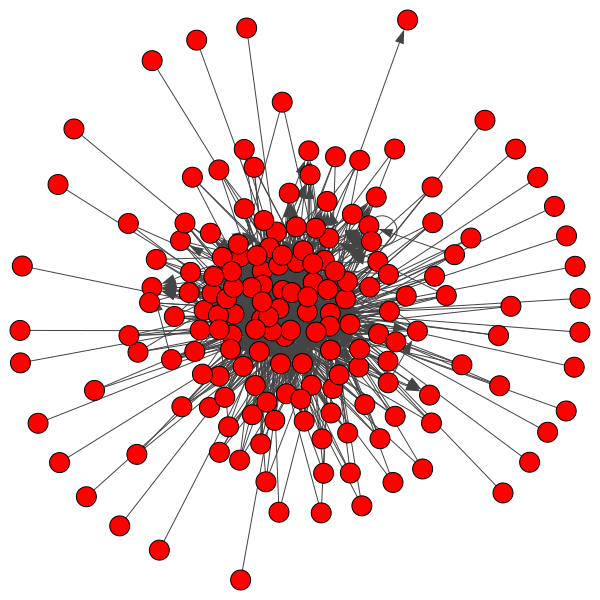

In [13]:
ig.plot(g)

In [14]:
g.diameter()

5

In [15]:
len(g.vs.indices)

175

In [16]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

Cayman Islands              32
United States               27
United Kingdom              24
Switzerland                 23
Singapore                   21
                            ..
Suriname                     1
Central African Republic     1
Guam                         1
Uganda                       1
Sudan                        1
Name: node_start, Length: 169, dtype: int64

In [17]:
uni =df_jur_grouped['node_start'].unique()

In [18]:
len(uni)

169

In [19]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 2, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 4, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 5, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 6, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 7, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 8, {'name': 'Nevada'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 9, {'name': 'Niue'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 10, {'name': 'Panama'}),
 igraph.Vertex(<igraph.Graph object at 0x7f7901a35b80>, 11, {'name': 'Samoa'}),
 

In [20]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
         #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [22]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,54.540230,0.01,5.0,-0.453080,7.448276,0.042806,2.158872
1,2,52.971098,0.01,5.0,-0.453601,7.410405,0.042835,2.149235
2,3,52.023256,0.02,5.0,-0.451261,7.430233,0.043199,2.146151
3,4,52.128655,0.02,5.0,-0.452733,7.385965,0.043193,2.148711
4,5,51.923529,0.03,5.0,-0.452726,7.423529,0.043668,2.144431


In [23]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
170,171,0.0,0.87,0.0,NaN,0.0,0.0,NaN
171,172,0.0,0.88,0.0,NaN,0.0,0.0,NaN
172,173,0.0,0.88,0.0,NaN,0.0,0.0,NaN
173,174,0.0,0.89,0.0,NaN,0.0,0.0,NaN
174,175,0.0,0.89,NaN,NaN,0.0,NaN,NaN


In [24]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,32.0,98.879440,-0.452211,1174.580460,0.041848,2.161182
1,2,0.01,32.0,98.840621,-0.451616,1181.352601,0.042267,2.159644
2,3,0.02,32.0,98.981167,-0.454009,1185.366279,0.042320,2.161746
3,4,0.02,32.0,97.353558,-0.450841,1191.239766,0.042680,2.163402
4,5,0.03,32.0,97.495119,-0.451780,1197.105882,0.042768,2.165435


In [25]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
160,161,0.82,880.0,0.857143,-0.408248,73.642857,0.045918,1.631579
161,162,0.83,880.0,0.923077,-0.408248,79.307692,0.053254,1.631579
162,163,0.83,880.0,0.583333,-1.000000,77.416667,0.041667,1.538462
163,164,0.84,880.0,0.454545,-1.000000,84.363636,0.041322,1.500000
164,165,0.84,880.0,0.300000,-1.000000,92.700000,0.040000,1.428571
165,166,0.85,27.0,0.111111,NaN,3.000000,0.024691,1.333333
166,167,0.85,27.0,0.125000,NaN,3.375000,0.031250,1.333333
167,168,0.86,0.0,0.000000,NaN,0.000000,0.000000,NaN
168,169,0.86,0.0,0.000000,NaN,0.000000,0.000000,NaN
169,170,0.87,0.0,0.000000,NaN,0.000000,0.000000,NaN


### Targeted attack

In [26]:
##try sort by transitivity 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'transitivity':g.transitivity_local_undirected(mode='zero',weights='weight')})

In [27]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='transitivity',ascending=False)

In [28]:
temp_df.head(50)

,Node_indice,Nodes,transitivity
174,174,Zimbabwe,2.000000
114,114,Libya,2.000000
130,130,Nicaragua,2.000000
127,127,Mozambique,2.000000
126,126,Morocco,2.000000
125,125,Montenegro,2.000000
36,36,Bangladesh,2.000000
37,37,Belarus,2.000000
104,104,Jamaica,2.000000
141,141,Puerto Rico,2.000000


In [29]:
temp_df.tail(50)

,Node_indice,Nodes,transitivity
42,42,Liberia,1.064677
7,7,Hong Kong,1.054163
103,103,Italy,1.047450
33,33,Wyoming,1.039039
92,92,Haiti,1.000000
19,19,Saint Kitts and Nevis,0.911951
116,116,Macao,0.753401
11,11,Samoa,0.700392
119,119,Malaysia,0.676677
5,5,Cook Islands,0.652306


In [30]:
#extract out by Node
transitivity_of_del = temp_df['Nodes'].tolist()

In [31]:
#print the list to check it
transitivity_of_del

['Zimbabwe',
 'Libya',
 'Nicaragua',
 'Mozambique',
 'Morocco',
 'Montenegro',
 'Bangladesh',
 'Belarus',
 'Jamaica',
 'Puerto Rico',
 'Bolivia',
 'Botswana',
 'Honduras',
 'Chad',
 'Dominica',
 'Croatia',
 'Oman',
 'Macedonia',
 'Cuba',
 'Angola',
 'Tunisia',
 'Trinidad and Tobago',
 'Tanzania',
 'Syria',
 'Slovakia',
 'Senegal',
 'Latvia',
 'Jordan',
 'Finland',
 'Turkey',
 'Iceland',
 'Czech Republic',
 'Indonesia',
 'Nigeria',
 'Bulgaria',
 'Egypt',
 'Norway',
 'Netherlands Antilles',
 'Ukraine',
 'Dominican Republic',
 'Pakistan',
 'US Virgin Islands',
 'Denmark',
 'Aruba',
 'Saudi Arabia',
 'Gibraltar',
 'Lebanon',
 'Kenya',
 'Argentina',
 'Fiji',
 'Kuwait',
 'South Africa',
 'South Korea',
 'Russia',
 'Sweden',
 'Estonia',
 'Vietnam',
 'Paraguay',
 'Germany',
 'Japan',
 'Peru',
 'Saint Vincent and the Grenadines',
 'Guatemala',
 'Azerbaijan',
 'Venezuela',
 'Belgium',
 'Thailand',
 'El Salvador',
 'Mexico',
 'Qatar',
 'Ghana',
 'Monaco',
 'Austria',
 'Liechtenstein',
 'French Gu

In [32]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [34]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,Zimbabwe,54.580460,5.0,-0.452450,7.448276,0.042806,2.159726
1,2,0.01,Libya,54.491329,5.0,-0.450893,7.479769,0.043236,2.158108
2,3,0.02,Nicaragua,54.494186,5.0,-0.449713,7.505814,0.043638,2.158448
3,4,0.02,Mozambique,54.362573,5.0,-0.448733,7.538012,0.044082,2.155931
4,5,0.03,Morocco,54.276471,5.0,-0.447176,7.564706,0.044498,2.154385


In [35]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
170,171,0.87,Guyana,0.0,0.0,NaN,0.0,0.0,NaN
171,172,0.88,Central African Republic,0.0,0.0,NaN,0.0,0.0,NaN
172,173,0.88,Saint Martin (French part),0.0,0.0,NaN,0.0,0.0,NaN
173,174,0.89,Sierra Leone,0.0,0.0,NaN,0.0,0.0,NaN
174,175,0.89,Albania,0.0,NaN,NaN,0.0,NaN,NaN


In [36]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Zimbabwe,100.459098,32.0,-0.452450,1258.298851,0.042806,2.159726
1,2,0.01,Libya,100.418400,32.0,-0.450893,1265.560694,0.043236,2.158108
2,3,0.02,Nicaragua,100.515018,32.0,-0.449713,1272.843023,0.043638,2.158448
3,4,0.02,Mozambique,100.473098,32.0,-0.448733,1280.269006,0.044082,2.155931
4,5,0.03,Morocco,100.181175,32.0,-0.447176,1287.558824,0.044498,2.154385
5,6,0.03,Montenegro,99.885798,32.0,-0.445564,1295.100592,0.044956,2.152694
6,7,0.04,Bangladesh,99.845860,32.0,-0.444859,1302.791667,0.045422,2.151108
7,8,0.04,Belarus,99.686255,32.0,-0.444408,1310.491018,0.045860,2.150013
8,9,0.05,Jamaica,99.568300,32.0,-0.443606,1318.253012,0.046269,2.150571
9,10,0.05,Puerto Rico,99.544472,32.0,-0.442159,1326.224242,0.046722,2.148942


In [37]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
25,26,0.13,Senegal,98.212873,32.0,-0.419323,1466.382550,0.055403,2.123636
26,27,0.14,Latvia,98.177149,32.0,-0.419327,1466.939189,0.055835,2.123066
27,28,0.14,Jordan,98.114182,32.0,-0.417207,1466.333333,0.056365,2.122488
28,29,0.15,Finland,97.781867,32.0,-0.415631,1475.876712,0.056859,2.123221
29,30,0.15,Turkey,97.776668,32.0,-0.414323,1485.324138,0.057313,2.122931
...,...,...,...,...,...,...,...,...,...
170,171,0.87,Guyana,0.000000,0.0,NaN,0.000000,0.000000,NaN
171,172,0.88,Central African Republic,0.000000,0.0,NaN,0.000000,0.000000,NaN
172,173,0.88,Saint Martin (French part),0.000000,0.0,NaN,0.000000,0.000000,NaN
173,174,0.89,Sierra Leone,0.000000,0.0,NaN,0.000000,0.000000,NaN


#### Unweighted

In [38]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted
#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 100)
#ax[0].set_ylim([0,12])
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

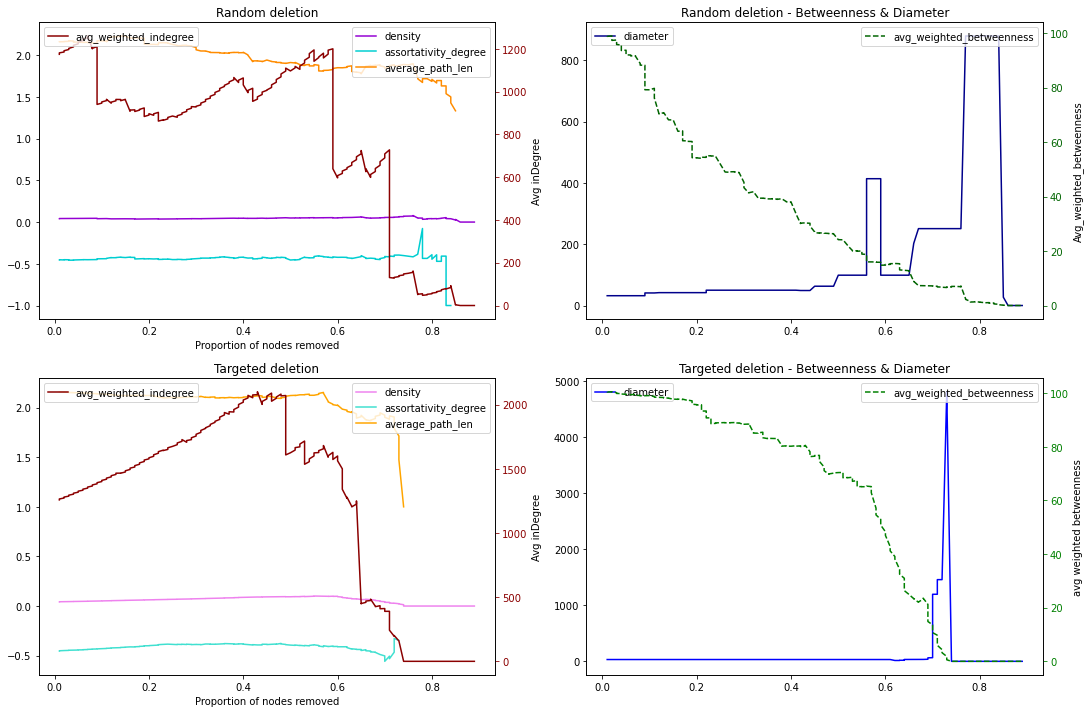

In [39]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()